In [1]:
from pathlib import Path
import json
from matplotlib import pyplot as plt
import numpy as np

In [2]:
RESULT_PATH = Path("results/exp1")

results = {}
for result_path in RESULT_PATH.glob("*/rouge_results.json"):
    k = result_path.parent.name
    results[k] = json.loads(result_path.read_text())

RESULT_KEYS = list(results.keys())
scores = ["rouge_1", "rouge_2", "rouge_3", "rouge_4", "rouge_l"]

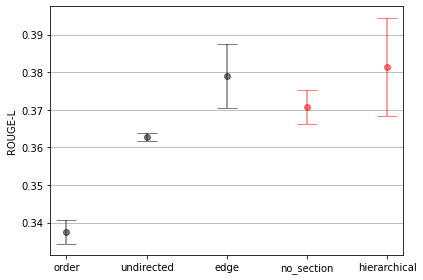

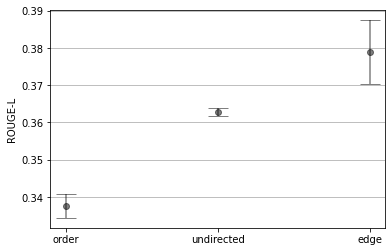

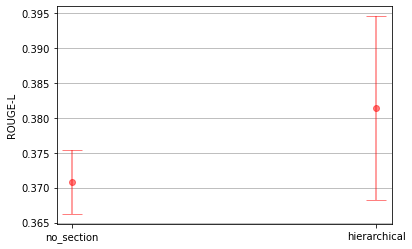

In [3]:
# effect of centrality bias
score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
    elif "f=0.0_b=1.0_s=1.5" in k:
            pass
    else:
        result_keys.append(k)
        scores.append(results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)

x_labels = ['order', 'undirected', 'edge', 'no_section', 'hierarchical']
x_ticks = np.arange(len(x_labels))
y_values = [np.mean(y_data[l]) for l in x_labels]
y_bars = [np.std(y_data[l]) for l in x_labels]


fig, ax = plt.subplots()
ax.errorbar(x_ticks[:3], y_values[:3], yerr=y_bars[:3], alpha=0.5, ecolor='black', capsize=10, fmt='ko')
ax.errorbar(x_ticks[3:], y_values[3:], yerr=y_bars[3:], alpha=0.5, ecolor='red', capsize=10, fmt='ro')
ax.set_ylabel(score_label)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

fig, ax = plt.subplots()
ax.errorbar(x_ticks[:3], y_values[:3], yerr=y_bars[:3], alpha=0.5, ecolor='black', capsize=10, fmt='ko')
ax.set_ylabel(score_label)
ax.set_xticks(x_ticks[:3])
ax.set_xticklabels(x_labels[:3])
ax.yaxis.grid(True)

# Save the figure and show
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

fig, ax = plt.subplots()
ax.errorbar(x_ticks[3:], y_values[3:], yerr=y_bars[3:], alpha=0.5, ecolor='red', capsize=10, fmt='ro')
ax.set_ylabel(score_label)
ax.set_xticks(x_ticks[3:])
ax.set_xticklabels(x_labels[3:])
ax.yaxis.grid(True)

# Save the figure and show
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

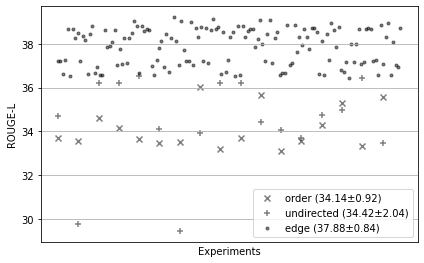

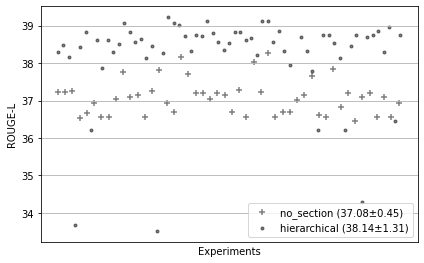

In [5]:
# effect of centrality bias
score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
#     elif "f=0.0_b=1.0_s=1.5" in k:
#             pass
    else:
        result_keys.append(k)
        scores.append(100*results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)


fig, ax = plt.subplots()
x_labels = ['order', 'undirected', 'edge']
fmts = ['x', '+', '.']
for fmt,l in zip(fmts,x_labels):
    mean = np.mean(y_data[l])
    std = np.std(y_data[l])
    label = f"{l} ({mean:.2f}±{std:.2f})"
    y = y_data[l]
    x_ticks = np.arange(len(y))/len(y)
    ax.scatter(x_ticks, y, alpha=0.5, label=label, marker=fmt, color='black')

ax.set_ylabel(score_label)
ax.set_xlabel("Experiments")
# ax.set_xticklabels(x_labels)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.xticks([], [])
plt.legend()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
    elif "f=0.0_b=1.0_s=1.5" in k:
            pass
    else:
        result_keys.append(k)
        scores.append(100*results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)

fig, ax = plt.subplots()
x_labels = ['no_section', 'hierarchical']
fmts = ['+', '.']
for fmt,l in zip(fmts,x_labels):
    mean = np.mean(y_data[l])
    std = np.std(y_data[l])
    label = f"{l} ({mean:.2f}±{std:.2f})"
    y = y_data[l]
    x_ticks = np.arange(len(y))/len(y)
    ax.scatter(x_ticks, y, alpha=0.5, label=label, marker=fmt, color='black')

ax.set_ylabel(score_label)
ax.set_xlabel("Experiments")

# ax.set_xticklabels(x_labels)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.xticks([], [])
plt.legend()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

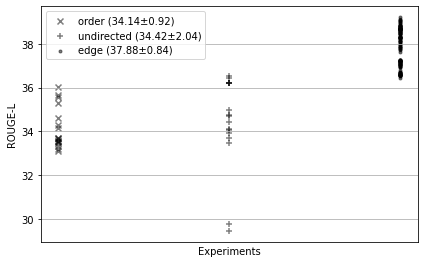

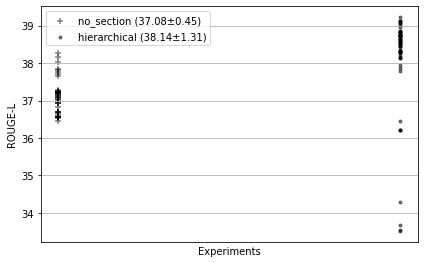

In [6]:
# effect of centrality bias
score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
#     elif "f=0.0_b=1.0_s=1.5" in k:
#             pass
    else:
        result_keys.append(k)
        scores.append(100*results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)


fig, ax = plt.subplots()
x_labels = ['order', 'undirected', 'edge']
fmts = ['x', '+', '.']
for i, (fmt,l) in enumerate(zip(fmts,x_labels)):
    mean = np.mean(y_data[l])
    std = np.std(y_data[l])
    label = f"{l} ({mean:.2f}±{std:.2f})"
    y = y_data[l]
    x_ticks = [i+1 for _ in y]
    ax.scatter(x_ticks, y, alpha=0.5, label=label, marker=fmt, color='black')

ax.set_ylabel(score_label)
ax.set_xlabel("Experiments")
# ax.set_xticklabels(x_labels)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.xticks([], [])
plt.legend()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
    elif "f=0.0_b=1.0_s=1.5" in k:
            pass
    else:
        result_keys.append(k)
        scores.append(100*results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)

fig, ax = plt.subplots()
x_labels = ['no_section', 'hierarchical']
fmts = ['+', '.']
for i, (fmt,l) in enumerate(zip(fmts,x_labels)):
    mean = np.mean(y_data[l])
    std = np.std(y_data[l])
    label = f"{l} ({mean:.2f}±{std:.2f})"
    y = y_data[l]
    x_ticks = [i+1 for _ in y]
    ax.scatter(x_ticks, y, alpha=0.5, label=label, marker=fmt, color='black')

ax.set_ylabel(score_label)
ax.set_xlabel("Experiments")

# ax.set_xticklabels(x_labels)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.xticks([], [])
plt.legend()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

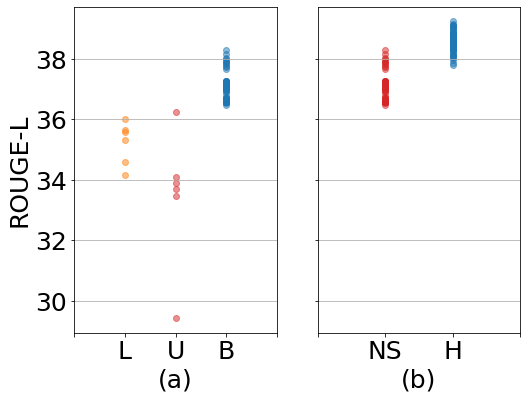

In [11]:
# effect of centrality bias
score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
    elif "no_sections" not in k:
        pass
    else:
        result_keys.append(k)
        scores.append(100*results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_xlim(left=0,right=4)
ax2.set_xlim(left=0,right=3)

x_labels = ['order', 'undirected', 'edge']
fmts = ['tab:orange', 'tab:red', 'tab:blue']
for i, (fmt,l) in enumerate(zip(fmts,x_labels)):
    mean = np.mean(y_data[l])
    std = np.std(y_data[l])
    label = f"{l} ({mean:.2f}±{std:.2f})"
    y = y_data[l]
    x_ticks = [i+1 for _ in y]
    ax1.scatter(x_ticks, y, alpha=0.5, label=label, color=fmt)

ax1.set_ylabel(score_label, fontsize=25)
ax1.tick_params(axis='both', which='major',labelsize=25)
ax1.set_xticks([0,1,2,3,4])
ax1.set_xlabel("(a)", fontsize=25)
ax1.set_xticklabels(['','L', 'U', 'B',''], fontsize=25)
ax1.yaxis.grid(True)

score = "rouge_l"
score_label = "ROUGE-L"
metric = "f_score"
scores = []
result_keys = []
for k in RESULT_KEYS:
    if "multiply" in k:
        pass
#     elif "f=0.0_b=1.0_s=1.5" in k:
#         pass
    elif "order" in k:
        pass
    elif "undirected" in k:
        pass
    else:
        result_keys.append(k)
        scores.append(100*results[k][f"{score}_{metric}"])


y_data = dict(
    undirected = [scores[i] for i,k in enumerate(result_keys) if "undirected" in k],
    order = [scores[i] for i,k in enumerate(result_keys) if "order" in k],
    edge = [scores[i] for i,k in enumerate(result_keys) if "edge" in k],
    no_section = [scores[i] for i,k in enumerate(result_keys) if "no_sections" in k],
    hierarchical = [scores[i] for i,k in enumerate(result_keys) if not "no_sections" in k]
)

x_labels = ['no_section', 'hierarchical']
fmts = ['tab:red', 'tab:blue']
for i, (fmt,l) in enumerate(zip(fmts,x_labels)):
    mean = np.mean(y_data[l])
    std = np.std(y_data[l])
    label = f"{l} ({mean:.2f}±{std:.2f})"
    y = y_data[l]
    x_ticks = [i+1 for _ in y]
    ax2.scatter(x_ticks, y, alpha=0.5, label=label, color=fmt)

ax2.set_xlabel("(b)", fontsize=25)
ax2.set_xticks([0,1,2,3])

ax2.set_xticklabels(["",'NS', 'H',""], fontsize=25)
ax2.yaxis.grid(True)

# Save the figure and show

plt.savefig('ablation_scatter.png')
# plt.legend(fontsize=25)
plt.show()
